<a href="https://colab.research.google.com/github/Korbisch/Master-Thesis-Notebooks/blob/main/MA_Klassifizierung_Farbe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Masterarbeit Neuronale Netze und Deep Learning**

**Thema:** Architekturen von neuronalen Netzen für die Klassifizierung von Kleidungsstücken: Konzeption und Implementierung einer vergleichenden Analyse

**Klassifizierung:** Farbe

**Autor:** Korbinian Schleifer

In diesem Notebook wird beispielhaft eine Architektur eines neuronalen Netzes erstellt, um Kleidungsstücke zu klassifizieren.

<img src="https://cdn.pixabay.com/photo/2020/02/15/14/19/network-4851079_1280.jpg" width="800"/>

# Vorgehen & Inhaltsverzeichnis:

1. Import & Installation aller benötigten Libraries und Frameworks
2. Download der Daten
3. Datenvorverarbeitung
4. Laden der Daten als Numpy Array
5. Datensplit
6. Modell erstellen
7. Test des Modells

# 0. Setup

Um eine möglichst schnelle Laufzeit und geringe Wartezeiten zu garantieren sollte eine GPU für das Training verwendet werden.

In der Navigations-Leiste unter dem Punkt `Laufzeit => Laufzeittyp ändern => Hardwarebeschleuniger` kann eine GPU Instanz ausgewählt werden.

# 1. Import & Installation aller benötigten Libraries und Frameworks

Installationen werden für die Ausführung in Colab nicht benötigt, sondern nur bei lokaler Ausführung.

Installationen müssen nur einmal ausgeführt werden.
Imports können bei einem Verbindungsverlust erneut benötigt werden.

Für die Verwendung von command line Funktionen muss in Jupyter Notebooks ein `!` an den Anfang der Zeile gesetzt werden.

In [ ]:
# install libraries
#!pip install tensorflow
#!pip install matplotlib
#!pip install numpy
#!pip install pandas

Alle Benötigten Libraries und Frameworks für das Projekt werden heruntergeladen:
- Tensorflow: Standard Machine Learning Framework für die Berechnung von Tensoroperationen
- Keras: High Level Framework für das Bauen von neuronalen Netzen
- Matplotlib: Für das Plotten von Graphen und Anzeigen von Bildern
- Numpy: Einfache Bearbeitung von mehrdimensionalen Arrays
- Pandas: Für die Datenvorverarbeitung z.B. Einlesen von CSV-Dateien
- OS: Standard Betriebssystem Funktionen

In [ ]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.preprocessing.image import load_img

#import importlib
#importlib.import_module('mpl_toolkits').__path__
#from mpl_toolkits.mplot3d import Axes3D

#from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy as np
import pandas as pd
# system libraries
import datetime, os
import time
import random
import platform
# for google colab only
#from google.colab import drive
from google.colab import files

# print version numbers
print('Tensorflow version: {}'.format(tf.__version__))
print('Python version: {}'.format(platform.python_version()))
print('Keras version: {}'.format(keras.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))

Tensorflow version: 2.4.0
Python version: 3.6.9
Keras version: 2.4.0
Numpy version: 1.19.4
Pandas version: 1.1.5
Matplotlib version: 3.2.2


# 2. Download der Daten







Die Daten werden auf der Webseite Kaggle zur Verfügung gestellt. Um die Daten herunterzuladen muss ein Account erstellt werden und man muss sich mit der Kaggle API verbinden.

Der Original Datensatz stammt von Param Aggarwal und kann unter folgendem Link abgerufen werden: https://www.kaggle.com/paramaggarwal/fashion-product-images-dataset. Die Bild Daten haben allerdings eine größe von mehr als 15 GB, was zu langen Wartezeiten bei der Ausführung führt. Zudem sind die Bilder sehr groß (1080x1440 und 1800x2400 Pixel), was für das Deep Learning wenig praktikabel ist.

Deshalb wurden alle Bilder aus diesem Datensatz auf 250x250 Pixel verkleinert. Der angepasste Datensatz ist unter folgendem Link verfügbar: https://www.kaggle.com/dataset/009b0b26d6b841054c137dc96f021703d7d74669d9f2fcb3acb9fb0c3ecb78a8

### 2.1 Account bei Kaggle erstellen
Besuche die Webseite Kaggle: https://www.kaggle.com und erstelle einen Account.

### 2.2 Download des Kaggle API Tokens
Unter `Profil => Account => API => Create New API Token` kann eine Json-Datei mit dem persönlichen Kaggle API Token heruntergeladen werden.

### 2.3 Upload der Json Datei
Zelle ausführen und über den Button `Dateien auswählen` die Json-Datei hochladen.

In [ ]:
# Upload der kaggel.json Datei
files.upload()

### 2.4 Setup der Kaggle API

In [ ]:
# Kaggle installieren
!pip install -q kaggle
# Erstellen eines Kaggle Verzeichnisses
!mkdir -p ~/.kaggle
# Datei in dieses Verzeichnis kopieren
!cp kaggle.json ~/.kaggle/
# Überprüfen, ob Datei in diesem Verzeichnis ist
!ls ~/.kaggle
# Berechtigung ändern
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


### 2.5 Download der Daten
Der Datensatz wird mit dem Befehl `!kaggle datasets download` in das aktuelle Verzeichnis heruntergeladen, was in diesem Fall `/content` ist. Der Fortschritt des Downloads sollte in der Ausgabe erscheinen.

In [ ]:
# download the dataset
!kaggle datasets download -d korbinianschleifer/fashiondatasetnew

fashiondatasetnew.zip: Skipping, found more recently modified local copy (use --force to force download)


Nach erfolgreichem Download sollte die Datei `fashiondatasetnew.zip` verfügbar sein.

In [ ]:
# Inhalt des aktuellen Verzeichnisses ausgeben
!ls

 fashiondatasetnew.zip	'kaggle (1).json'   kaggle.json   sample_data


### 2.6 Entpacken der Daten
Da die Daten komprimiert sind, müssen sie noch entpackt werden.

In [ ]:
# unzip the data
!unzip fashiondatasetnew.zip

### 2.7 Festlegen des Daten-Pfads
Viele folgende Funktioen verwenden diese Konstante. Aus diesem Grund ist es entscheidend, hier den richtigen Pfad anzugeben. Im Normalfall ist dies: `/content/fashion-dataset-new` (An den Pfad sollte kein Slash angehängt werden).

Die Ausgabe sollte den Ordner `images` und die Datei `styles.csv` anzeigen.

In [ ]:
# set the dataset path
DATASET_PATH = '/content/fashion-dataset-new'
# should print out the folder: images and the file: styles.csv
print(os.listdir(DATASET_PATH))

['styles.csv', 'images']


### 2.8 Bilder untersuchen

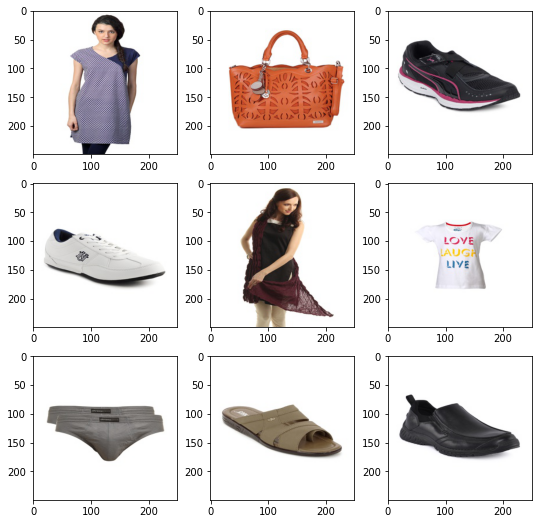

In [ ]:
# plot some images to inspect data
image_path = DATASET_PATH + '/images/'
fig = plt.figure(figsize=(9, 9))
for i in range(9):
  img_file = random.choice(os.listdir(image_path))
  image = plt.imread(image_path + img_file)
  fig.add_subplot(3, 3, i+1)
  plt.imshow(image)

plt.show()

# 3. Datenvorverarbeitung

### 3.1 Einlesen der CSV Datei

Hier wird die CSV-Datei eingelesen in der die Attribute zu jedem Bild spezifiziert sind.
Die Datei wird mithilfe von Pandas eingelesen und es wird ein Dataframe erstellt (df).
Einen Dataframe kann man sich wie eine Tabelle oder Excel-Liste vorstellen, in der Daten gespeichert werden.

Zudem werden alle Zeilen zufällig gemischt und die ersten 5 Zeilen des Dataframes ausgegeben, um den Erfolg des Vorgangs zu kontrollieren.

In [ ]:
# read the csv file
df = pd.read_csv(DATASET_PATH + '/styles.csv', sep=';')
# randomly shuffle the dataset
df = df.sample(frac = 1)
# reset the index
df = df.reset_index(drop=True)
# show first five rows
df.head(5)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,4708,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex New York Plaid Digital Black Watch
1,52847,Women,Accessories,Jewellery,Earrings,Red,Summer,2012.0,Casual,Adrika Red Earrings
2,9041,Men,Footwear,Shoes,Formal Shoes,Black,Winter,2011.0,Formal,Buckaroo Men Moles Black Formal Shoes
3,50550,Men,Apparel,Innerwear,Boxers,Blue,Winter,2016.0,Casual,Chromozome Men Pack of 2 Assorted Boxers
4,13555,Women,Footwear,Shoes,Casual Shoes,Red,Fall,2011.0,Casual,Carlton London Women Casual Red Casual Shoes


### 3.2 Auswahl der Klassen

Hier wird ein Ausschnitt des Dataframes ausgewählt. Die ausgewählte Kategorie (Spaltenname) soll später klassifiziert werden.

Dazu muss die Variable ```category``` auf den Spaltennamen geänder werden.

In [ ]:
# specify category(column) you want to predict from the Data Frame here
category = 'baseColour'

# create new subset data frame
sub_df = df[['id', category]]
sub_df.head(5)

,id,baseColour
0,4708,Black
1,52847,Red
2,9041,Black
3,50550,Blue
4,13555,Red


### 3.3 Löschen von kleinen Klassen

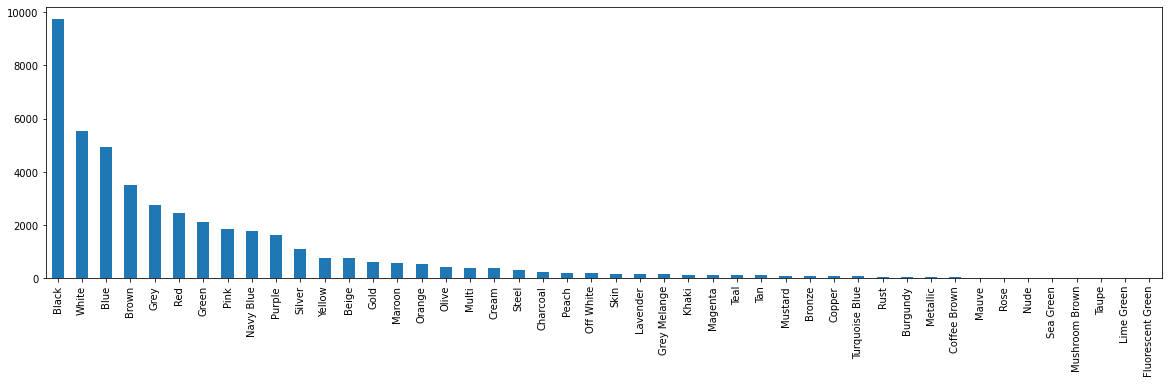

In [ ]:
# Problem: uneven distributed value counts
value_counts = sub_df[category].value_counts()
# create the plot
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

In dem oberen Histogramm erkennt man, dass die Klassen sehr ungleichmäßig verteilt sind. Es gibt Klassen, für die nur sehr wenige Bilder verfügbar sind und Klassen, für die sehr viele Bilder verfügbar sind.

Merkmale aus Klassen mit nur wenigen Bildern können vom Modell nicht gut erlernt werden, da die Anzahl der Beispiele einfach zu gering ist.

Um dies zu vermeiden sollten alle Klassen in gleicher Anzahl vorliegen. Dazu werden Klassen mit nur wenigen Bildern komplett gelöscht (z.B. <= 100 oder <= 1000).

In [ ]:
# remove labels below specified count
# all labels with a count that is lower or equal will be removed
count = 1500

# get a list(series) of labels with lower count
count_series = sub_df[category].value_counts()
to_remove = count_series[count_series <= count].index
# prints labels that will be deleted
print(to_remove)

Index(['Silver', 'Yellow', 'Beige', 'Gold', 'Maroon', 'Orange', 'Olive',
       'Multi', 'Cream', 'Steel', 'Charcoal', 'Peach', 'Off White', 'Skin',
       'Lavender', 'Grey Melange', 'Khaki', 'Magenta', 'Teal', 'Tan',
       'Mustard', 'Bronze', 'Copper', 'Turquoise Blue', 'Rust', 'Burgundy',
       'Metallic', 'Coffee Brown', 'Mauve', 'Rose', 'Nude', 'Sea Green',
       'Mushroom Brown', 'Taupe', 'Lime Green', 'Fluorescent Green'],
      dtype='object')


In [ ]:
# removing category types from data frame
# ~: inverts a boolean value, isin: returns if value is in list
sub_df = sub_df[~sub_df[category].isin(to_remove)]

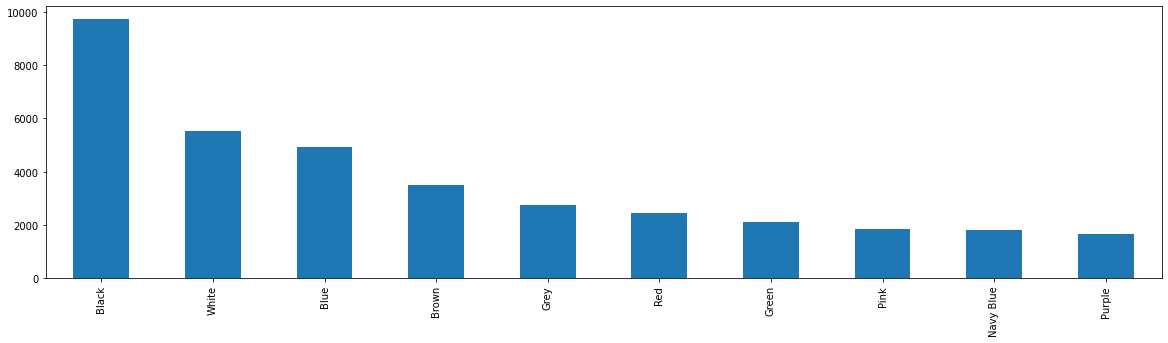

In [ ]:
# plot again to check if remove was successful
value_counts = sub_df[category].value_counts()
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

### 3.4 Gleichmäßige Verteilung der Klassen

Klassen mit vielen Bildern werden vom Modell zu stark erlernt, was dazu führt, dass das Modell einen Bias entwickelt. Aus diesem Grund müssen die Klassen gleichmäßig verteilt werden.

Aus allen Klassen mit zu vielen Bildern wird zufällig eine Anzahl ausgewählt, die der Anzahl der kleinsten Klasse entspricht.

In [ ]:
# group labels by category
sub_df = sub_df.groupby(category)
# get the minimum category count
min_count = sub_df.size().min()
# distribute labels evenly with minimum label count
sub_df = sub_df.sample(min_count)

In [ ]:
# Undo the groupby by randomly shuffling data and resetting the index

# randomly shuffle the dataset
sub_df = sub_df.sample(frac = 1)
# reset the index
sub_df = sub_df.reset_index(drop=True)

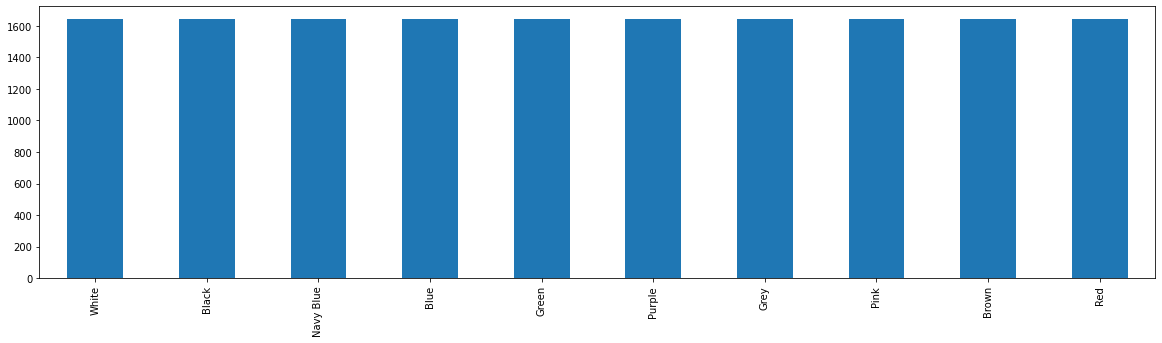

In [ ]:
# plot again to check if balancing was successful
value_counts = sub_df[category].value_counts()
plt.figure(figsize=(20,5))
value_counts.plot(kind='bar')
plt.show()

### 3.5 Umwandlung in numerische Daten

In [ ]:
# cast column category to 'category' data type
sub_df = sub_df.astype({category: 'category'})
# add new column with class numbers
sub_df['class_number'] = sub_df[category].cat.codes

sub_df.head(5)

,id,baseColour,class_number
0,19904,Pink,6
1,18284,Pink,6
2,41219,Red,8
3,12941,Blue,1
4,40431,Navy Blue,5


### 3.6 Speichern der Klassen als Liste

Die Label werden als Liste gespeichert, um später die Korrektheit der Klassifizierung zu kontrollieren.

In [ ]:
# create a data frame sorted by class_number
sorted_df = sub_df.sort_values('class_number')

# list of labels
unique_types = sorted_df[category].unique().to_list()
print(unique_types)

['Black', 'Blue', 'Brown', 'Green', 'Grey', 'Navy Blue', 'Pink', 'Purple', 'Red', 'White']


In [ ]:
# test: the index of the list should be equal to the class_number
print(unique_types[1])

Blue


# 4. Laden der Daten als Numpy Arrays

### 4.1 Festlegen der Variablen

Alle wichtigen Variablen für das Deep Learning werden hier festgelegt.

*   ```color_mode``` Untersuchter Farbmodus, entweder in Farbe oder schwarz-weiß
*   ```channels``` Anzahl der Farbkanäle, bei Farbe: 3, bei schwarz-weiß: 1
*   ```img_height``` Höhe eines Bildes
*   ```img_width``` Breite eines Bildes

In [ ]:
# specify the color mode for the images
color_mode = 'rgb'
#color_mode = 'grayscale'

# specify the color channels: 3 for rgb, 1 for greyscale
channels = 3

# resizing of the images to
img_height = 50
img_width = 50

# set the number of class labels to predict for softmax classifier
classes = len(unique_types)
print(classes)

# total number of images to load
total_imgs = len(sub_df)

10


### 4.2 Funktion zum Laden der Bilder

1.   Laden eines Bildes
2.   Umwandlung in Numpy Array
3.   Ändern in spezifizierte Größe
4.   Ändern des Datentyps (für Tensorflow)
5.   Normalisierung



In [ ]:
# function to get the data from source
def fetch_images():

    # using a python list because numpy arrays are super slow when adding values
    image_data = []
    # get the list of images from data frame
    image_list = sub_df['id'].tolist()

    # for progress updates
    first = 0
    last = len(image_list)
    start_time = time.time()

    for image_id in image_list:
        image_path = DATASET_PATH + '/images/' + str(image_id) + '.jpg'

        try:
            # read image with keras function
            image = load_img(image_path, color_mode=color_mode, target_size=(img_height, img_width)) 
        except ImportError:
            #print("\n" + image_path + " could not be loaded")
            print('PIL is not available')
        except ValueError:
            print('interpolation method is not supported.')

        # make sure images have the right size and dimensions for keras
        # transform to numpy
        image = np.array(image, ndmin=4)
        image = np.reshape(image, [img_height, img_width, channels])
        image = np.float32(image)
        # normalise data
        image /= 255.0
        # add image to list
        image_data.append(image)
        
        # control progress
        end_time = time.time()
        first += 1
        print("\r[{}/{}]:{}% of images loaded, time: {}".format(first, last, int(first/last*100), end_time-start_time), end="")

    return image_data

Loading all the images from the directory. 

### 4.3 Bilder und Label laden

Bilder laden

In [ ]:
# load the images
image_data = fetch_images()

[16430/16430]:100% of images loaded, time: 21.074434518814087

In [ ]:
# convert python list to numpy array
image_data = np.array(image_data)
image_data.shape

(16430, 50, 50, 3)

In [ ]:
# check image data
print(image_data[9000])

Label laden

In [ ]:
# load the labels
label_data = sub_df['class_number'].tolist()

In [ ]:
print(label_data[1])

3


In [ ]:
# create numpy array of labels
label_data = np.array(label_data, dtype='uint8')
# check for correct length: equal to number of instances from image_data
len(label_data)

16430

In [ ]:
# convert labels to binary class matrix
label_data = tf.keras.utils.to_categorical(label_data)
#print(label_data)

# 5. Datensplit

Split numpy Arrays in drei Teile:


1.   Trainingsdaten
2.   Validierungsdaten
3.   Testdaten

z.B. 80% / 10% / 10%



In [ ]:
# get the indices where to do the split
split1 = int(0.8 * total_imgs)
split2 = int(0.9 * total_imgs)
print(split1, split2)

13144 14787


In [ ]:
# train split
train_images = image_data[:split1]
train_labels = label_data[:split1]

# validation split
val_images = image_data[split1:split2]
val_labels = label_data[split1:split2]

# test split
test_images = image_data[split2:]
test_labels = label_data[split2:]

print('number of training samples: {} equals {}%'.format(len(train_images), round(len(train_images)/total_imgs*100)))
print('number of validation samples: {} equals {}%'.format(len(val_images), round(len(val_images)/total_imgs*100)))
print('number of test samples: {} equals {}%'.format(len(test_images), round(len(test_images)/total_imgs*100)))

number of training samples: 13144 equals 80%
number of validation samples: 1643 equals 10%
number of test samples: 1643 equals 10%


# 6. Modell erstellen

In [ ]:
# create sequential model with keras

network = models.Sequential()
network.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.Dropout(0.5))

network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(classes, activation='softmax'))

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         1

In [ ]:
# not needed anymore
# visualize the network model
#keras.utils.plot_model(network)

In [ ]:
# model kompilieren
# loss: 2 classes: binary_crossentropy, 3+ classes: categorical_crossentropy
# optimizers: Adam, RMSprop
network.compile(optimizer = keras.optimizers.Adam(),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
# tensorboard still needed?
# Clear any logs from previous runs
#!rm -rf ./logs/

In [ ]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard
# Tensorboard setup
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# train the network
history = network.fit(train_images, 
            train_labels, 
            validation_data=(val_images, val_labels), 
            epochs=20,
            batch_size=10,
            shuffle=True)
            #callbacks=[tensorboard_callback])

Epoch 1/20
1315/1315 [==============================] - 7s 5ms/step - loss: 1.9547 - accuracy: 0.2611 - val_loss: 1.3694 - val_accuracy: 0.5496
Epoch 2/20
1315/1315 [==============================] - 6s 5ms/step - loss: 1.2828 - accuracy: 0.5740 - val_loss: 1.0567 - val_accuracy: 0.6537
Epoch 3/20
1315/1315 [==============================] - 6s 5ms/step - loss: 1.1008 - accuracy: 0.6426 - val_loss: 0.9779 - val_accuracy: 0.6926
Epoch 4/20
1315/1315 [==============================] - 6s 5ms/step - loss: 1.0378 - accuracy: 0.6543 - val_loss: 1.0450 - val_accuracy: 0.6701
Epoch 5/20
1315/1315 [==============================] - 6s 5ms/step - loss: 0.9831 - accuracy: 0.6761 - val_loss: 1.0271 - val_accuracy: 0.6628
Epoch 6/20
1315/1315 [==============================] - 6s 5ms/step - loss: 0.9620 - accuracy: 0.6857 - val_loss: 0.9629 - val_accuracy: 0.6902
Epoch 7/20
1315/1315 [==============================] - 6s 5ms/step - loss: 0.9141 - accuracy: 0.6984 - val_loss: 1.0370 - val_accuracy:

### Diagramme des Trainings

Genauigkeit Klassifizierung Training & Validierung

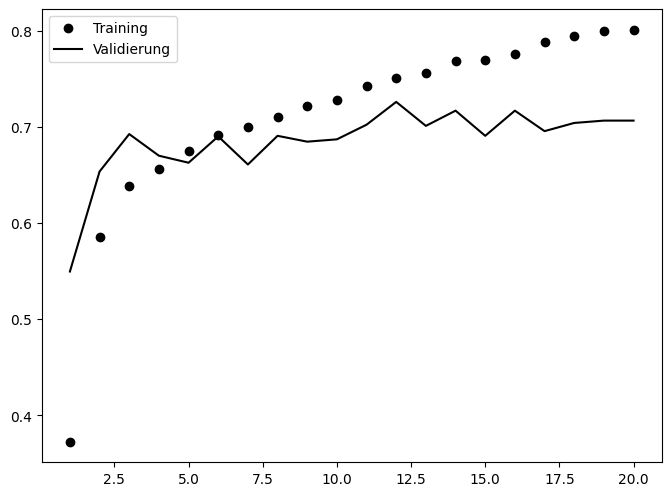

In [ ]:
# plot the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8,6), dpi=100)
plt.plot(epochs, acc, 'ko', label='Training')
plt.plot(epochs, val_acc, 'k', label='Validierung')
plt.legend()
plt.show()

Wert der Verlustfunktion Training & Validierung

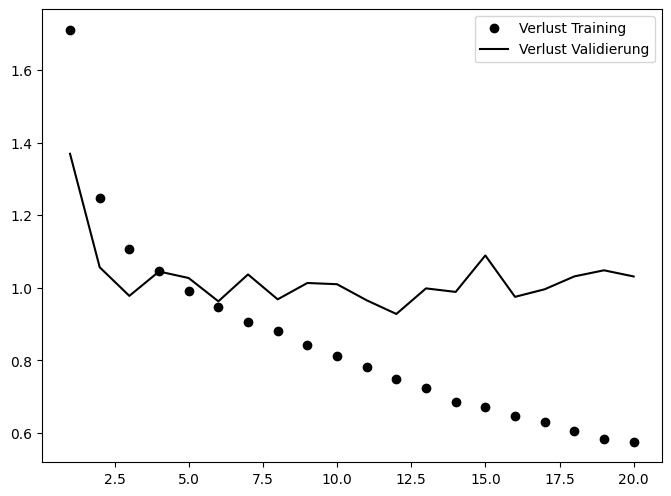

In [ ]:
# plot the loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(8,6), dpi=100)
plt.plot(epochs, loss, 'ko', label='Verlust Training')
plt.plot(epochs, val_loss, 'k', label='Verlust Validierung')
plt.legend()
plt.show()

In [ ]:
# start Tensorboard
#%tensorboard --logdir logs/fit
# reload
#%reload_ext tensorboard

In [ ]:
# free up memory space and clear model session
import gc
gc.collect()
keras.backend.clear_session()

In [ ]:
# speichern des modells
network.save('modell3-farbe.h5')

# 7. Test des Modells

auf unbekannten Daten

In [ ]:
# specify test accuracy
test_loss, test_acc = network.evaluate(test_images, test_labels, batch_size=1)
test_acc

1643/1643 [==============================] - 4s 2ms/step - loss: 1.0562 - accuracy: 0.7054


0.7054169178009033

In [ ]:
# specify test loss
test_loss

0.23900189995765686

### 7.1 Bilder testen und ausgeben

Als ersten werden aus den Test-Bildern 9 Stück zufällig ausgewählt.

Zuerst wird ein zufälliger Index aus den Bildern ausgewählt und eine Liste gespeichert.

In [ ]:
# create random indices from test images
indices = []
for i in range(9):
  rand = random.randint(0, len(test_images))
  indices.append(rand)
print(indices)

[405, 1281, 645, 568, 804, 1347, 161, 509, 1558]


Für alle Test-Bilder wird die Vorhersage der Klasse generiert und in der Variable predicitions gespeichert.

Die Vorhersage wird als Zahl ausgegeben. Diese wird in der Liste labels gespeidhert.

In [ ]:
# testing
# compare predicted labels to true labels
prediction = np.argmax(network.predict(test_images), axis=-1)
predicted_labels = []
true_labels = []

for num in indices:
  predicted_labels.append(prediction[num])
  true_labels.append(np.argmax(test_labels[num]))

for i in range(len(predicted_labels)):
  print('img: {}, predicted class: {}, true label: {}, result: {}'
  .format(sub_df.loc[split2 + indices[i], 'id'], predicted_labels[i], 
          true_labels[i], predicted_labels[i] == true_labels[i]))

img: 55202, predicted class: 6, true label: 6, result: True
img: 15938, predicted class: 2, true label: 2, result: True
img: 18296, predicted class: 6, true label: 6, result: True
img: 6981, predicted class: 5, true label: 7, result: False
img: 39520, predicted class: 0, true label: 0, result: True
img: 39865, predicted class: 8, true label: 8, result: True
img: 41660, predicted class: 1, true label: 1, result: True
img: 47794, predicted class: 8, true label: 2, result: False
img: 11550, predicted class: 1, true label: 1, result: True


Die Bilder werden geplottet.

Über den Index vom Data Frame wird das passende Bild gesucht, indem der zufällige Index zum Index des beginnenden Test-Splits hinzugefügt wird.

Der Titel wird über die Liste `unique_types` aus den gespeicherten Labels ausgewählt.

### 7.2 Plot der Klassifizierung

True: Klassifizierung ist richtig
False: Klassifizierung ist falsch

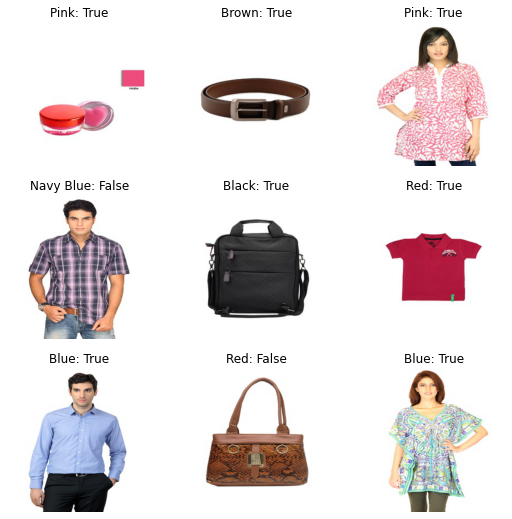

In [ ]:
# index for data frame
image_path = DATASET_PATH + '/images/'
fig = plt.figure(figsize=(9, 9))


for i in range(9):
  # get the image path from the data frame
  image_id = sub_df.loc[split2 + indices[i], 'id']
  image = plt.imread(image_path + str(image_id) + '.jpg')
  fig.add_subplot(3,3,i+1)
  # get the predicted label
  plt.title(unique_types[predicted_labels[i]] + ': ' + str(predicted_labels[i] == true_labels[i]))
  plt.imshow(image)
  plt.axis('off')


# Eigene Bilder testen

In [ ]:
# connect colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Masterarbeit

Datei_0000.jpeg  Datei_001.jpeg  Datei_003.jpeg  Datei_005.jpeg  IMG_2639.JPG
Datei_000.jpeg	 Datei_002.jpeg  Datei_004.jpeg  IMG_2638.JPG


In [ ]:
# path to private images
pvt_images_path = '/content/drive/MyDrive/Masterarbeit/'

In [ ]:
pvt_images = []
image_path = pvt_images_path + 'Datei_000.jpeg'
try:
  # read image with keras function
  image = load_img(image_path, color_mode=color_mode, target_size=(img_height, img_width))
            
except ImportError:
  #print("\n" + image_path + " could not be loaded")
  print("PIL is not available")
except ValueError:
  print("interpolation method is not supported.")

# make sure images have the right size and dimensions for keras
image = np.array(image, ndmin=4)
image = np.reshape(image, [img_height, img_width, channels])
image = np.float32(image)
# normalise data
image /= 255.0
# add image to list
pvt_images.append(image)

In [ ]:
# convert python list to numpy array
pvt_images = np.array(pvt_images)
pvt_images.shape

(1, 150, 150, 1)

In [ ]:
prediction = np.argmax(network.predict(pvt_images), axis=-1)
print(prediction)
label = unique_types[prediction[0]]

[1]


Text(0.5, 1.0, 'Bottomwear')

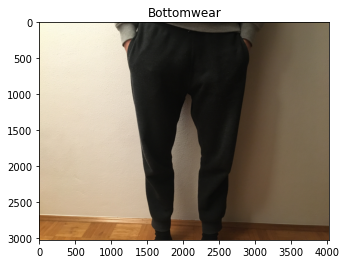

In [ ]:
image = plt.imread(image_path)
plt.imshow(image)
plt.title(label)

# Notizen

In [ ]:
# use tensorboard in colab
https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tensorboard_in_notebooks.ipynb

In [ ]:
# gpu specs
!nvidia-smi

Mon Jan  4 17:08:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W /  70W |    751MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# cpu specs
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo

MemTotal:       13333596 kB
MemFree:        10723924 kB
MemAvailable:   12515736 kB
Buffers:           80176 kB
Cached:          1853784 kB
SwapCached:            0 kB
Active:           636608 kB
Inactive:        1692972 kB
Active(anon):     358440 kB
Inactive(anon):      348 kB
Active(file):     278168 kB
Inactive(file):  1692624 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               276 kB
Writeback:             0 kB
AnonPages:        395652 kB
Mapped:           206492 kB
Shmem:               960 kB
Slab:             164728 kB
SReclaimable:     123708 kB
SUnreclaim:        41020 kB
KernelStack:        3744 kB
PageTables:         5124 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666796 kB
Committed_AS:    2609028 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              952 kB
AnonHugePages:   

In [ ]:
# ram capacity
import psutil
ram_gb = psutil.virtual_memory().total / 1e9
print(ram_gb)

13.653602304


In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7412 sha256=dccfc75242da3deb0772965511fa730803d66d8eaef60990ef275b1143ed01bc
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 111.8 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [ ]:
# operating system
!cat /etc/*release 

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive
!ls

In [ ]:
!pwd

/content
